In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score, roc_auc_score, roc_curve

# Classifying Loan Status Using Decision Trees

In [126]:
from google.colab import files
files.upload()

Saving loan_data.csv to loan_data.csv


{'loan_data.csv': b'credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid\r1,debt_consolidation,0.1189,829.1,11.35040654,19.48,737,5639.958333,28854,52.1,0,0,0,0\r1,credit_card,0.1071,228.22,11.08214255,14.29,707,2760,33623,76.7,0,0,0,0\r1,debt_consolidation,0.1357,366.86,10.37349118,11.63,682,4710,3511,25.6,1,0,0,0\r1,debt_consolidation,0.1008,162.34,11.35040654,8.1,712,2699.958333,33667,73.2,1,0,0,0\r1,credit_card,0.1426,102.92,11.29973224,14.97,667,4066,4740,39.5,0,1,0,0\r1,credit_card,0.0788,125.13,11.90496755,16.98,727,6120.041667,50807,51,0,0,0,0\r1,debt_consolidation,0.1496,194.02,10.71441777,4,667,3180.041667,3839,76.8,0,0,1,1\r1,all_other,0.1114,131.22,11.00209984,11.08,722,5116,24220,68.6,0,0,0,1\r1,home_improvement,0.1134,87.19,11.40756495,17.25,682,3989,69909,51.1,1,0,0,0\r1,debt_consolidation,0.1221,84.12,10.20359214,10,707,2730.041667,5630,23,1,0,0,0\r1,debt_consolidation

In [127]:
loan_df = pd.read_csv("loan_data.csv")
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loan_df.isna().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [ ]:
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


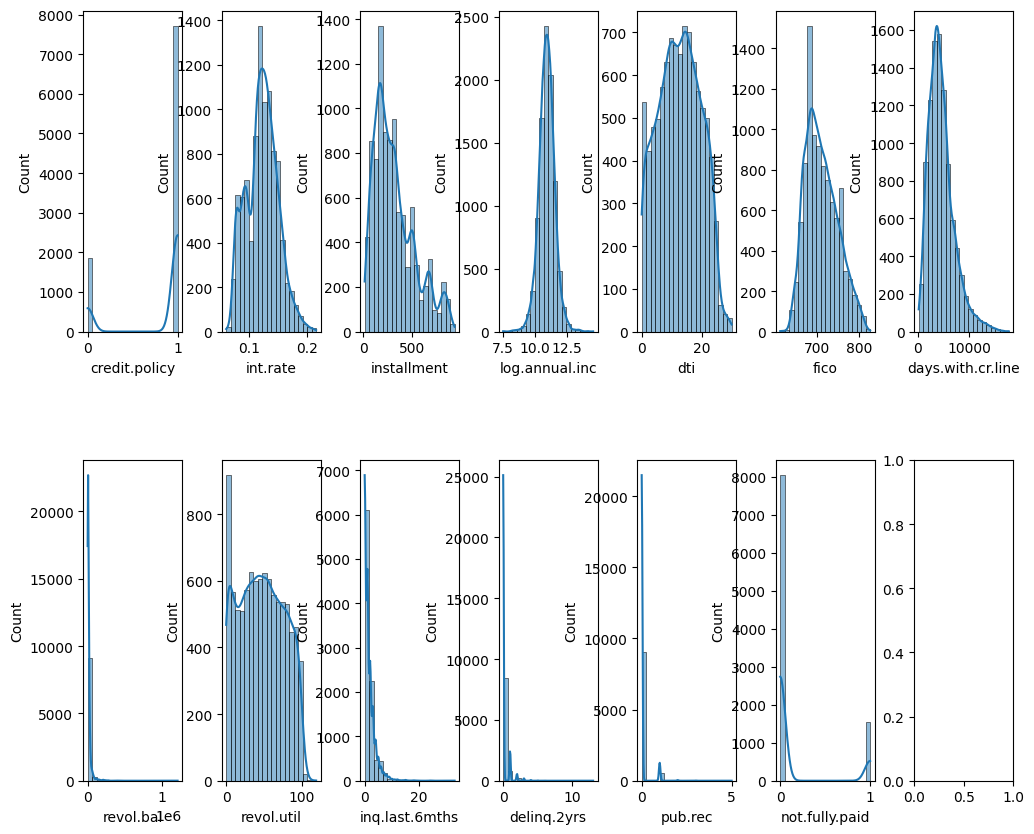

In [129]:
numeric_cols = loan_df.select_dtypes(include=['number']).columns
ncols = math.ceil(len(numeric_cols) / 2)
fix, axes = plt.subplots(2, ncols, figsize=(12, 10))
axes = axes.flatten()
for i,col in enumerate(numeric_cols):

  sns.histplot(loan_df[col], kde=True, ax=axes[i], bins=20)


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


In [ ]:
loan_df.dtypes

,0
credit.policy,int64
purpose,object
int.rate,float64
installment,float64
log.annual.inc,float64
dti,float64
fico,int64
days.with.cr.line,float64
revol.bal,int64
revol.util,float64


In [ ]:
numeric_columns = loan_df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
columns_to_scale = numeric_columns.difference(['not.fully.paid'])
loan_df[columns_to_scale] = scaler.fit_transform(loan_df[columns_to_scale])

In [ ]:
loan_encoded_df = pd.get_dummies(loan_df, columns=['purpose'])

In [ ]:
loan_encoded_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0,False,False,True,False,False,False,False
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,0,False,True,False,False,False,False,False
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0,False,False,True,False,False,False,False
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0,False,False,True,False,False,False,False
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0,False,True,False,False,False,False,False


In [ ]:
X = loan_encoded_df.drop('not.fully.paid', axis=1)
y = loan_encoded_df['not.fully.paid']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC score: {roc_auc}")

Accuracy: 0.7428670842032011
ROC-AUC score: 0.5356267922257232


# Predicting Hospital Readmission Using Logistic Regression

In [ ]:
from google.colab import files
files.upload()

Saving hospital_readmissions.csv to hospital_readmissions.csv


{'hospital_readmissions.csv': b'age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted\n[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no\n[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no\n[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes\n[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes\n[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no\n[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes\n[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no\n[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes\n[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes\n[70-80),8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes

In [ ]:
hospital_data = pd.read_csv('hospital_readmissions.csv')
hospital_data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [ ]:
hospital_data.isna().sum()

,0
age,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0
diag_1,0


There are no missing values.

In [ ]:
hospital_data.dtypes

,0
age,object
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,object
diag_1,object


In [ ]:
hospital_data.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [ ]:
num_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
cat_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']


In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_transformer = Pipeline(steps=[
    ('imputer', cat_imputer),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])


In [ ]:
hospital_data = preprocessor.fit_transform(hospital_data)

In [ ]:
X = hospital_data.drop(columns=['readmitted'])
y = hospital_data['readmitted'].replace({"yes": 1, "no": 0})

In [ ]:
y.head()

,readmitted
0,0
1,0
2,1
3,1
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['time_in_hospital',
                                                   'n_lab_procedures',
                                                   'n_procedures',
                                                   'n_medications',
                                                   'n_outpatient',
                                                   'n_inpatient',
                                                   'n_emergency']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['age', 'medical_specialty',
                                                   'diag_1', 'diag_2', 'diag_3',
                                                   'glucose_test', 'A1Ctest',
                                                   'change',
                                                   'diabetes_med'])])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.6044
Precision: 0.645383555351401
Recall: 0.3902777777777778
F1 Score: 0.486411632335122


#  Classifying Digit Images Using Decision Trees

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
DT_model = DecisionTreeClassifier().fit(X_train, y_train)

In [9]:
y_predicted = DT_model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_predicted)
conf_matx = confusion_matrix(y_test, y_predicted)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matx}")


Accuracy: 0.8714761904761905
Confusion Matrix: 
[[1870    2   21   13   13   31   27    6   18   21]
 [   6 2256   23   19   10   17   12   10   16    2]
 [  33   21 1709   70   34   18   31   43   71   20]
 [  14   13   54 1774   17   86   19   37   54   42]
 [  10   10   27   22 1804   12   28   22   29   86]
 [  28   17   20   95   16 1621   47   11   53   42]
 [  25   10   44    9   33   52 1886    3   44    8]
 [  12   20   31   28   24    9    7 1956   19   53]
 [  20   37   57   70   36   67   35   20 1645   55]
 [   7    9   20   51  107   50   14   52   42 1780]]


# Predicting Loan Approval Using Logistic Regression

In [35]:
from google.colab import files
files.upload()

Saving archive (6).zip to archive (6).zip


{'archive (6).zip': b'PK\x03\x04-\x00\x00\x08\x08\x00\xc2AmX<[r\xfb\xff\xff\xff\xff\xff\xff\xff\xff\x0f\x00\x14\x00loan_data_1.csv\x01\x00\x10\x00\x1dn\x00\x00\x00\x00\x00\x00\xb3\x17\x00\x00\x00\x00\x00\x00\x8d]K\x8f^\xb9q\xdd\xcf\xaf\xc8>\x1f\x1a\x97\xc5\xf7r`;\x8e\x01G02\xf1\xc2+\xa13\xea\x00\x02\xf4BOk1\xff>d\x15\xcf%y/\x8b\x9a\x01\xa4\x96z\xf4\x95\xc8\xe2\xa9\xe7)R\x8f\xbf\x7f}\xfe\xf2\xfeo\x7f~\xfc\xf5\xe5\xcb\x87\x97\xd7\xc7\x7f=\xbf\xbe~|\xf9\xf0\xf8\xf3\xcb\xb7\xfa\x8d/o\xbf=\xfe\xf2\xe1\xfb\xaf\xcfo\x1f\xbf~y\xfc\xf2\xf2\xe9\xff\xde\xff\xe5\xf3\xb7O_\x7f/\x7f\xe4\xe7o\xdf>}\xfc\xf5\xf9\xcb\xdb\xdf\xbe\xfc\xfa\xf5\xf3\xcb\xe3O_\x9f/\xdf\xa9\xb2\x7f\xfe\xfc\xf5\xfb\x977\xf9k\xe4\xd7\xef\xff\xe7\xe5\xf5\xf3\xe3O\xaf/\x1f>\xbe\xbd\xff\xcf\x8f\xbf\xbd}}\xfd\xfd\xf1\x8f\xd7\xaf\xdf^^\xdf~\x7f\xff\xf3\xeb\xcb\xb3\xfc\xe9_\xde\x9e\xdf\xbe\xff\xf6\xd3\xf1\xf8\xfb?\x8e\xc3\x1c\x87-\x8b\xfb\xf4\xf2\xf8\xd7\xcbo\x0f\xf3\xf8\xeb\xeb\xf3\x87\xef\xcfo/\x8fw_\x1f\xce\'\xfbt<\x8c?R\xfdB\xf5g\

In [23]:
loan_approval_data = pd.read_csv('loan_approval_dataset.csv')
loan_approval_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [39]:
from zipfile import ZipFile
with ZipFile('archive (6).zip', 'r') as zip:
  zip.extractall()

In [42]:
loan_approval_data = pd.read_csv('loan_data_1.csv')
loan_approval_data.drop('Unnamed: 0', axis=1, inplace=True)
loan_approval_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [46]:
loan_approval_data['Loan_ID'] = loan_approval_data['Loan_ID'].str.replace('LP', '').astype(int)

In [47]:
loan_approval_data['Loan_ID'].head()

,Loan_ID
0,1003
1,1005
2,1006
3,1008
4,1013


In [56]:
loan_approval_data.isna().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,6
Self_Employed,21
ApplicantIncome,12
CoapplicantIncome,18
LoanAmount,8
Loan_Amount_Term,11


In [59]:

loan_approval_data = loan_approval_data.ffill()

In [60]:
loan_approval_data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [80]:
cols = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']

In [81]:
label_encoder = LabelEncoder()
for col in cols:
  loan_approval_data[col] = label_encoder.fit_transform(loan_approval_data[col])

In [82]:
loan_approval_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,1005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,1006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,1008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,1013,1,1,0,1,0,2333.0,1516.0,95.0,360.0,1.0,2,1


In [83]:
loan_approval_data.dtypes

,0
Loan_ID,int64
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


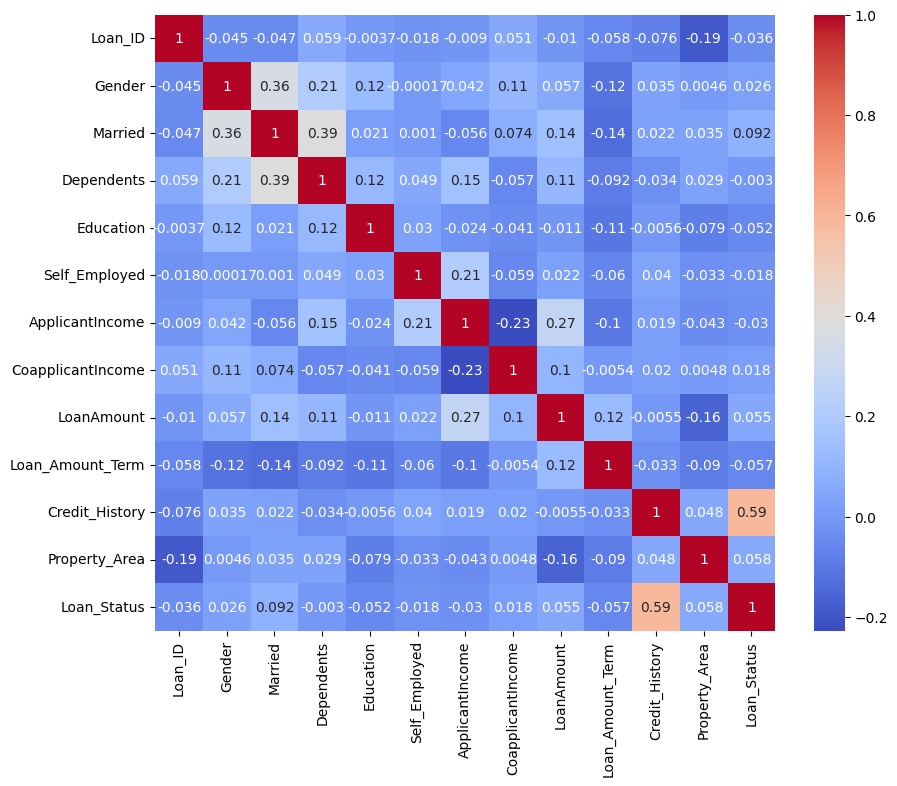

In [87]:
plt.figure(figsize=(10, 8))
sns.heatmap(loan_approval_data.corr(), cmap='coolwarm', annot=True)
plt.show()

In [91]:
X = loan_approval_data.drop('Loan_Status', axis=1)
y = loan_approval_data['Loan_Status']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [93]:
model = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
y_pred = model.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
conf_matx = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matx}")

Accuracy: 0.808695652173913
Confusion Matrix: 
[[12 19]
 [ 3 81]]


#  Classifying Wine Quality Using Decision Trees

In [103]:
from google.colab import files
files.upload()

Saving Wine.csv to Wine (1).csv


{'Wine (1).csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id\r\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0\r\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1\r\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2\r\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3\r\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4\r\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5\r\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5,6\r\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7\r\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8\r\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5,10\r\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5,12\r\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,13\r\n8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5,7,16\r\n7.

In [104]:
wine_data = pd.read_csv('Wine.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [105]:
wine_data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


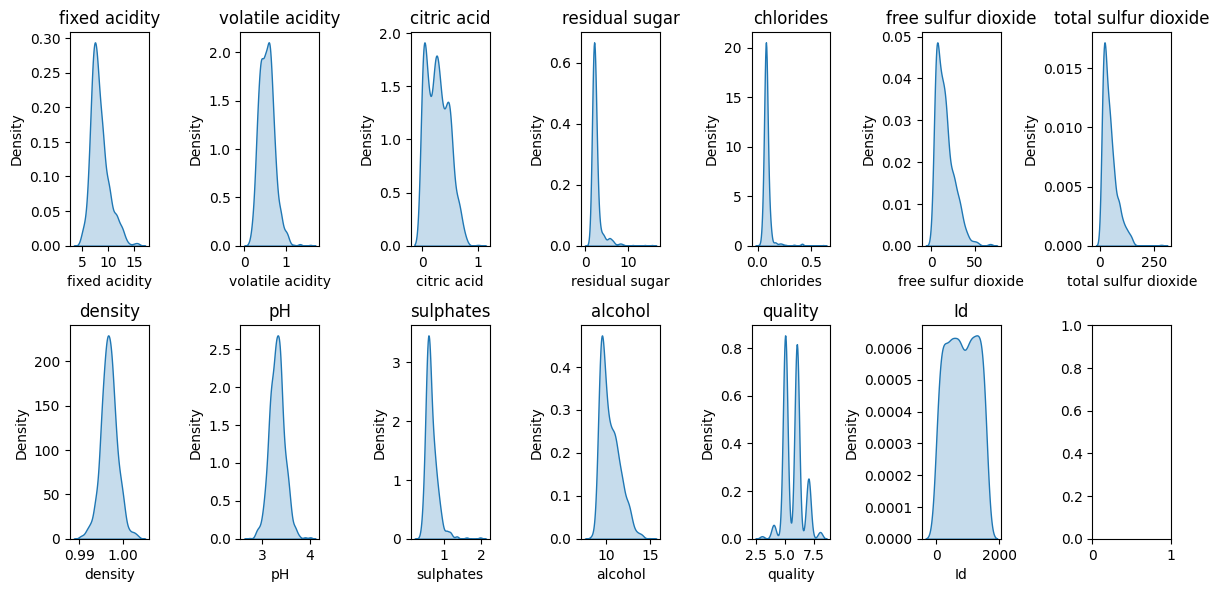

In [108]:
fig, axes = plt.subplots(2, 7, figsize=(12,6))
axes = axes.flatten()
for a, column in enumerate(wine_data.columns):
  sns.kdeplot(wine_data[column],ax=axes[a], fill=True)
  axes[a].set_title(column)
plt.tight_layout(pad=1.0)

plt.show()

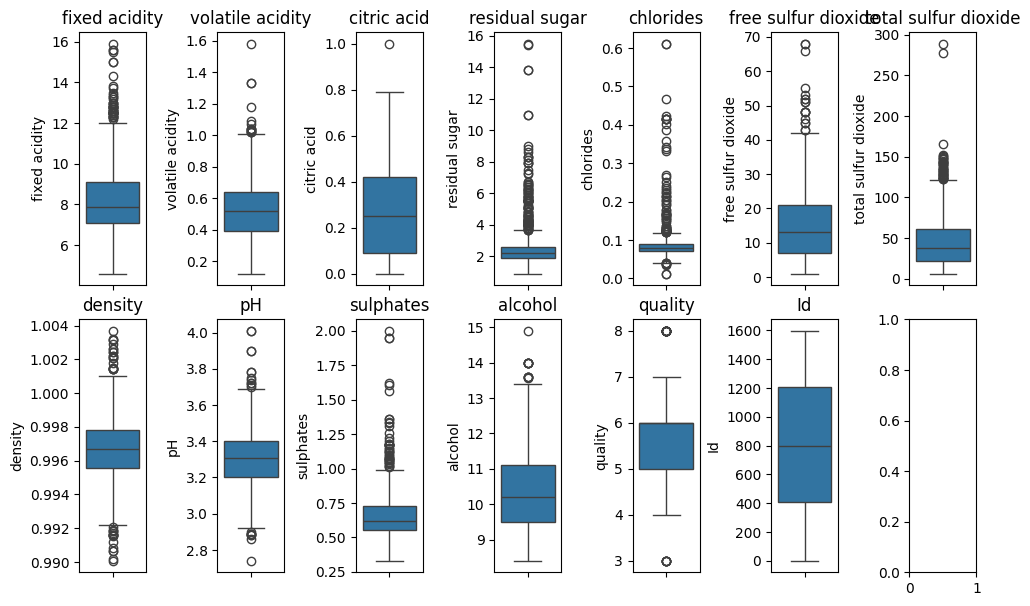

In [111]:
fig, axes = plt.subplots(2, 7, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(wine_data.columns):
  sns.boxplot(wine_data[column], ax=axes[i])
  axes[i].set_title(column)
plt.tight_layout(pad=0.5)
plt.show()

In [112]:
cols_to_normalize = ['fixed acidity', 'volatile acidity',  'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                     'sulphates']

In [113]:
standard_scaler = StandardScaler()
wine_data[cols_to_normalize] = standard_scaler.fit_transform(wine_data[cols_to_normalize])

In [114]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [116]:
DT_model = DecisionTreeClassifier().fit(X_train, y_train)

In [119]:
y_pred = DT_model.predict(X_test)

In [123]:
y_pred_proba = DT_model.predict_proba(X_test)

In [124]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='micro')
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.5510204081632653
ROC-AUC: 0.7306122448979592
